In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

def drift_diffusion():
    t1 = time()
    N = 10000 #takes about 25 seconds for N=10000, T=20, dt=0.001, bc order of steps is N*T/dt=200.000.000 
    dt = 0.001
    mu = 0.1
    sigma = 0.1
    v_th = 1
    T = 20

    t = np.linspace(0,T,int(T/dt))
    dxi = np.random.normal(0,sigma*np.sqrt(dt),[N,len(t)]) # create random noise for N neurons and len(t) times. 
    v = np.cumsum(dxi+mu*dt, axis=1) # add all the noise and some extra mu*dt factor cumulative 

    x = np.where(v>v_th) # look at where v is bigger than threshold
    succeeded_trials, dummy_ind = np.unique(x[0],return_index=True) # find the indices in dummy array where this occurs first time for each n and look at which n's succeeded
    timestamps = x[1][dummy_ind] # find the time index where this occurs for the first time
    FPT = np.full(N,T,dtype=float)
    FPT[succeeded_trials] = t[timestamps]

    plt.figure()
    plt.title("FPT histogram for random walk")
    plt.xlabel("FPT(s)")
    n,bins,patches = plt.hist(FPT,bins=50,density=True,stacked=True,label="N={} trials".format(N))
    rho = v_th/(np.sqrt(2*np.pi)*sigma*t**(3/2))*np.exp(-(v_th-mu*t)**2/(2*sigma**2*t))
    plt.plot(t,rho,label="theoretical FPT density")
    plt.legend()

    fig,ax = plt.subplots()
    for k in range(5):
        ax.plot(t,v[k],color=plt.cm.rainbow(k/5))
        ax.vlines(FPT[k],0,1,color=plt.cm.rainbow(k/5))
    ax.hlines(1,0,T,colors='black')
    ax.set_xlabel("time(s)")
    ax.set_ylabel("v")
    ax.set_title("some random walk trials")
    
    t2 = time()
    print("Time to calculate: "+str(round(t2-t1)))


def compare_estimates():
    t1 = time()
    N = 1000 #takes about 80 seconds for N=1000, T=20, dt=0.001, mu=20, sigma=25 bc order of steps is N*T/dt*mu*sigma=10^10.  
    dt = 0.01
    v_th = 1
    T = 20

    mu_array = np.linspace(0.1,1,20)
    sigma_array = np.linspace(0.1,2,25)
    FPT_array = np.zeros([len(mu_array),len(sigma_array),N])

    for i,mu in enumerate(mu_array):
        print(i,"μ =",mu)
        for j,sigma in enumerate(sigma_array):
            t = np.linspace(0,T,int(T/dt))
            dxi = np.random.normal(0,sigma*np.sqrt(dt),[N,len(t)]) # create random noise for N neurons and len(t) times. 
            v = np.cumsum(dxi+mu*dt, axis=1) # add all the noise and some extra mu*dt factor cumulative 

            x = np.where(v>v_th) # look at where v is bigger than threshold
            succeeded_trials, dummy_ind = np.unique(x[0],return_index=True) # find the indices in dummy array where this occurs first time for each n and look at which n's succeeded
            timestamps = x[1][dummy_ind] # find the time index where this occurs for the first time
            FPT = np.full(N,T,dtype=float)
            FPT[succeeded_trials] = t[timestamps]
            FPT_array[i][j] = FPT

    #calculate values for μ,σ averaged over N
    f = np.mean(1/FPT_array,axis=2)
    avg = 1/np.mean(FPT_array,axis=2)
    std = f-avg 

    fig1,ax1 = plt.subplots()
    for i in np.arange(0,len(sigma_array),7):
        ax1.plot(mu_array,avg[:,i]/mu_array,label="σ={}".format(round(sigma_array[i],1)))
    ax1.set_xlabel('μ')
    ax1.set_ylabel('μ / μ_exact')
    ax1.set_title('μ error for different σ')
    ax1.legend()

    fig2,ax2 = plt.subplots()
    ax2.plot(sigma_array**2,np.mean(std,axis=0)/sigma_array**2) 
    ax2.set_xlabel("σ^2")
    ax2.set_ylabel("σ^2 / σ_exact^2")
    ax2.set_title("σ^2 error averaged over μ's") 

    t2 = time()
    print("Time to calculate: "+str(round(t2-t1)))


/Users/samsuidman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
/Users/samsuidman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply


Time to calculate: 24


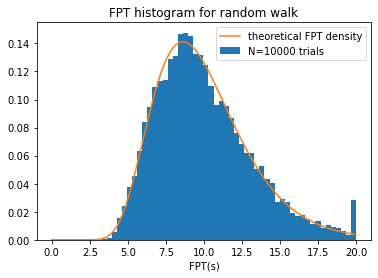

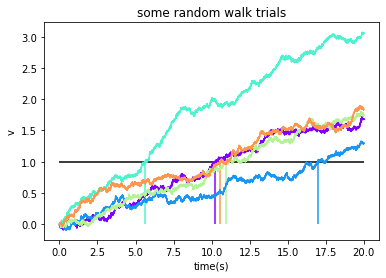

In [3]:
drift_diffusion()

0 μ = 0.1
1 μ = 0.1473684210526316
2 μ = 0.19473684210526315
3 μ = 0.24210526315789474
4 μ = 0.2894736842105263
5 μ = 0.33684210526315794
6 μ = 0.38421052631578945
7 μ = 0.43157894736842106
8 μ = 0.4789473684210527
9 μ = 0.5263157894736842
10 μ = 0.5736842105263158
11 μ = 0.6210526315789474
12 μ = 0.6684210526315789
13 μ = 0.7157894736842105
14 μ = 0.7631578947368421
15 μ = 0.8105263157894737
16 μ = 0.8578947368421053
17 μ = 0.9052631578947369
18 μ = 0.9526315789473684
19 μ = 1.0
Time to calculate: 72


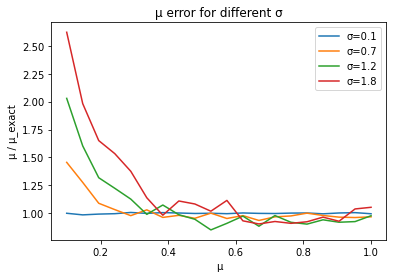

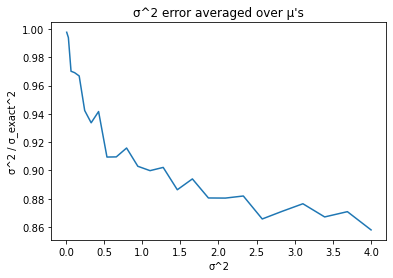

In [4]:
compare_estimates()